In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import decimal
from decimal import Decimal as Dc

In [73]:
Smin = 0.001
c = 0.01
ds = 0.01
S = Smin*(1+c)**np.arange(1000)

In [74]:
class iSITH():
    def __init__(self, tau_min=.005, tau_max=3, buff_max=None, k=50, ntau=20, dt=1, g=0.0):
        super(iSITH, self).__init__()
        self.k = k
        self.tau_min = tau_min
        self.tau_max = tau_max
        if buff_max is None:
            buff_max = 3*tau_max
        self.buff_max = buff_max
        self.ntau = ntau
        self.dt = dt
        self.g = g

        self.c = (tau_max/tau_min)**(1./(ntau-1))-1
        self.tau_star = tau_min*(1+self.c)**np.arange(ntau).astype(float)
        self.s = 1/self.tau_star
Sith1 = iSITH(tau_min=0.04818896416694335,tau_max=1000,ntau=500)
S1 = Sith1.s[::-1]
c1 = Sith1.c
Sith2 = iSITH(tau_min=0.04818896416694335,tau_max=1000,ntau=250)
S2 = Sith2.s[::-1]
c2 = Sith2.c
Sith3 = iSITH(tau_min=0.04818896416694335,tau_max=1000,ntau=100)
S3 = Sith3.s[::-1]
c3 = Sith3.c
Sith4 = iSITH(tau_min=0.04818896416694335,tau_max=1000,ntau=25)
S4 = Sith4.s[::-1]
c4 = Sith4.c

In [75]:
delt_frac = 0.1
dt = delt_frac / S[-1]
ns = 100
t_max = ns * dt
T = np.arange(0,t_max,dt)

In [76]:
#def updateF(F,S,c,dt):
#    dlogs = 1
#    log1pc = np.log(1+c)
#    
#    partial = np.zeros(len(F))
#    rhs = np.zeros(len(F))
#    
#    partial[1:] = np.diff(F)
#    rhs[1:] = S[1:] * (F[1:] * log1pc * dlogs + partial[1:])
#    rhs = rhs*(-dt)
#    newF = np.zeros(len(F))
#    newF[0] = 1
#    for i in range(1, len(F)):
#        newF[i] = rhs[i] + newF[i-1] + (F[i] - F[i-1])
#    return newF

In [77]:
def updateFn(F,S,c,dt):
    
    dFdn = np.diff(F)
    d2F_dtdn = S[1:]*dt*np.log(1+c)*F[1:] + S[1:]*dt*dFdn

    newF = np.zeros(len(F))
    newF[0] = 1
    
    for i in range(1,len(F)):
        dF_prior_dt = newF[i-1] - F[i-1]
        dF_dt = dF_prior_dt - d2F_dtdn[i-1]
        newF[i] = F[i] + dF_dt
    return newF

In [86]:
F = np.full([len(S)],1)
F1 = np.full([len(S1)],1)
F2 = np.full([len(S2)],1)
F3 = np.full([len(S3)],1)
F4 = np.full([len(S4)],1)

for t in T:
    F = updateFn(F=F,S=S,c=c,dt=dt)
    F1 = updateFn(F=F1, S=S1,c=c1, dt=dt)
    F2 = updateFn(F=F2, S=S2,c=c2, dt=dt)
    F3 = updateFn(F=F3, S=S3,c=c3, dt=dt)
    F4 = updateFn(F=F4, S=S4,c=c4, dt=dt)


Text(0.5, 1.0, '25 S Values')

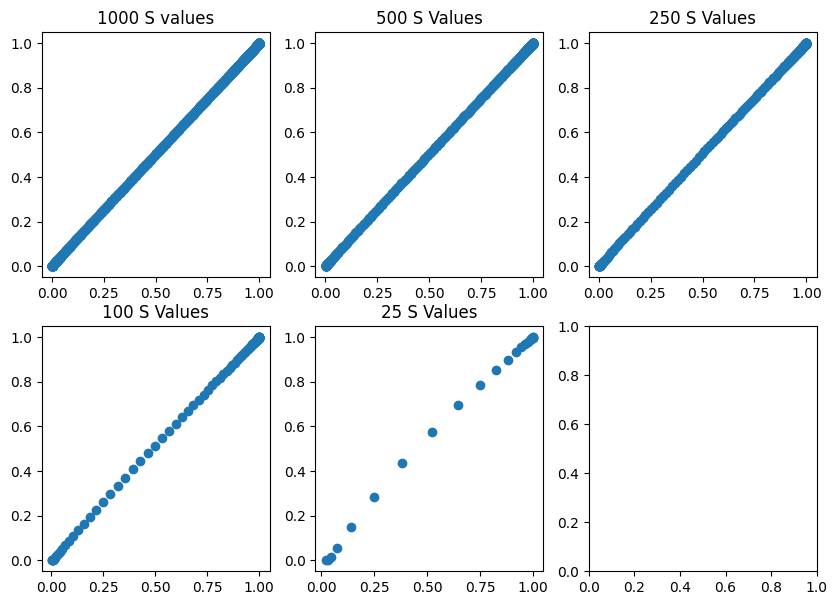

In [87]:
fig, ax = plt.subplots(2,3,figsize = (10,7))
ax[0,0].scatter(F,np.exp(-t_max*S))
ax[0,0].set_title("1000 S values")
ax[0,1].scatter(F1, np.exp(-t_max*S1))
ax[0,1].set_title("500 S Values")
ax[0,2].scatter(F2, np.exp(-t_max*S2))
ax[0,2].set_title("250 S Values")
ax[1,0].scatter(F3, np.exp(-t_max*S3))
ax[1,0].set_title("100 S Values")
ax[1,1].scatter(F4, np.exp(-t_max*S4))
ax[1,1].set_title("25 S Values")

0.01
0.020120341550512233
0.04072876873336839


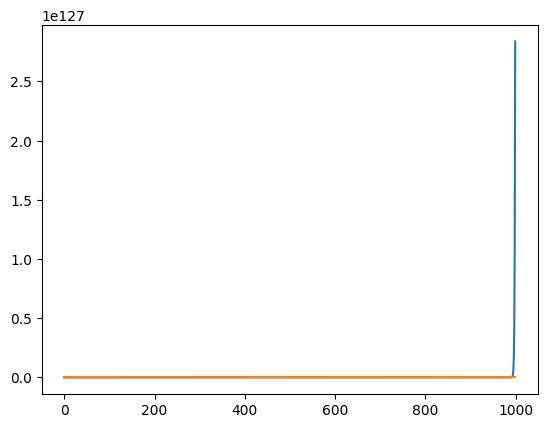

In [23]:
print(c)
print(c1)
print(c2)
plt.plot(F, label="1000 S")
plt.plot(np.exp(-t_max*S), label="exp c=0.01")
#plt.plot(F1, label="500 S")
#plt.plot(F2, label="200 S")

Text(0.5, 1.0, 'dt = 0.00963779283338867')

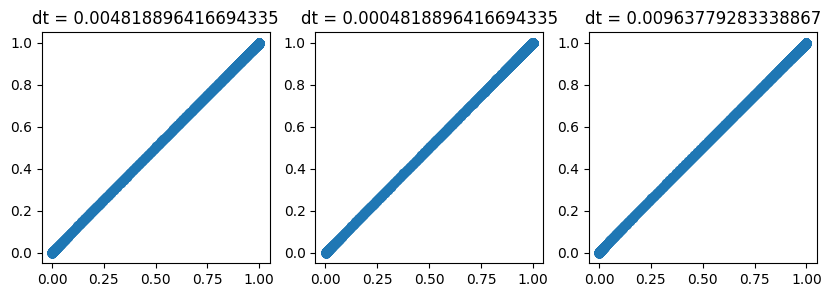

In [10]:
fig, ax = plt.subplots(1,3,figsize = (10,3))
ax[0].scatter(F,np.exp(-t_max*S))
ax[0].set_title("dt = %s" %(dt))
ax[1].scatter(F3, np.exp(-t_max*S))
ax[1].set_title("dt = %s" %(dt3))
ax[2].scatter(F4, np.exp(-t_max*S))
ax[2].set_title("dt = %s" %(dt4))

In [21]:
T5 = np.arange(0,1000*dt,dt)
F5 = np.full([len(S)],1)
for t in T5:
    F5 = updateF(F=F5,S=S,dt=dt)

Text(0.5, 1.0, 'ns = 1000')

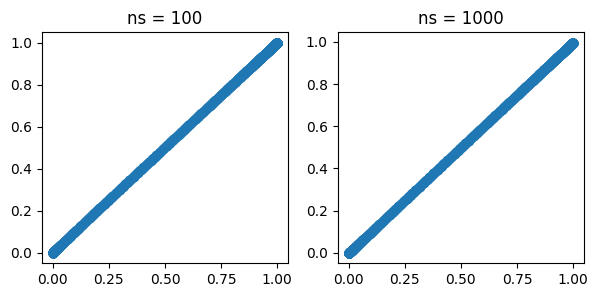

In [22]:
fig, ax = plt.subplots(1,2,figsize = (7,3))
ax[0].scatter(F,np.exp(-t_max*S))
ax[0].set_title("ns = 100")
ax[1].scatter(F5, np.exp(-1000*dt*S))
ax[1].set_title("ns = 1000")

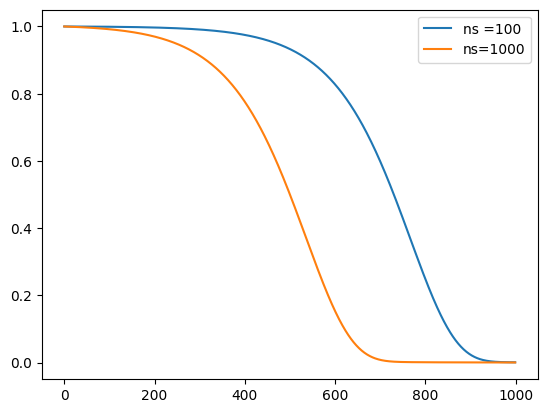

In [25]:
plt.plot(F, label="ns =100")
plt.plot(F5, label="ns=1000")
plt.legend()

In [32]:
F2 = np.full([len(S2)],1)
T = np.arange(0,100*dt,dt)
T2 = np.arange(0,500*dt,dt)
T3 = np.arange(0,10*dt,dt)
T5 = np.arange(0,1000*dt,dt)
for t in T:
    F2 = updateF(F=F2,S=S2,dt=dt)
F2_T = F2
F2 = np.full([len(S2)],1)
for t in T2:
    F2 = updateF(F=F2,S=S2,dt=dt)
F2_T2 = F2
F2 = np.full([len(S2)],1)
for t in T3:
    F2 = updateF(F=F2,S=S2,dt=dt)
F2_T3 = F2
F2 = np.full([len(S2)],1)
for t in T5:
    F2 = updateF(F=F2,S=S2,dt=dt)
F2_T5 = F2

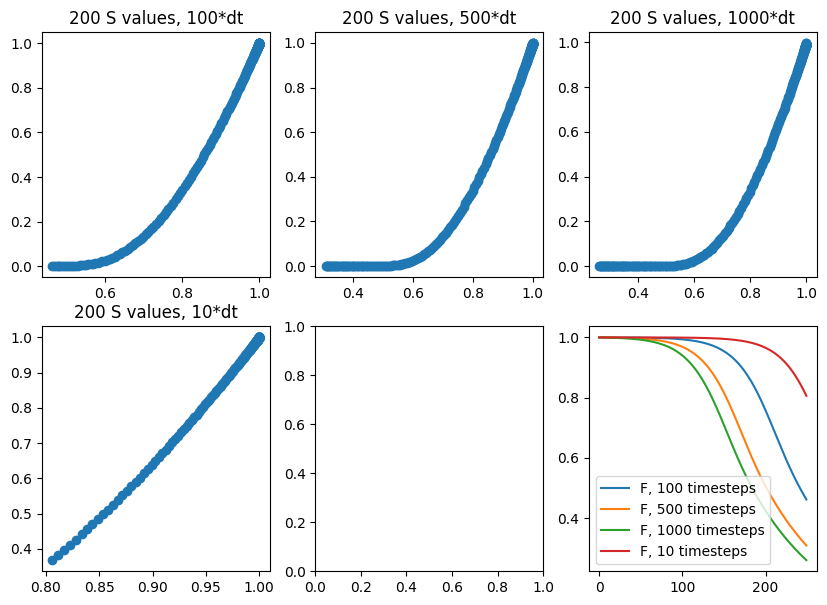

In [33]:
fig,ax = plt.subplots(2,3, figsize=(10,7))
ax[0,0].scatter(F2_T, np.exp(-100*dt*S2))
ax[0,1].scatter(F2_T2, np.exp(-500*dt*S2))
ax[0,2].scatter(F2_T5, np.exp(-1000*dt*S2))
ax[1,2].plot(F2_T, label="F, 100 timesteps")
ax[1,2].plot(F2_T2 , label="F, 500 timesteps")
ax[1,2].plot(F2_T5, label="F, 1000 timesteps")
ax[1,2].plot(F2_T3, label="F, 10 timesteps")
ax[0,0].set_title("200 S values, 100*dt")
ax[0,1].set_title("200 S values, 500*dt")
ax[0,2].set_title("200 S values, 1000*dt")
ax[1,0].scatter(F2_T3, np.exp(-10*dt*S2))
ax[1,0].set_title("200 S values, 10*dt")
ax[1,2].legend()